# step 1 Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve,precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pickle
import json
# import warnings
# warnings.filterwarnings('ignore')


# step 2 loading dataset and verifying

In [80]:
# Load the dataset
df = pd.read_csv("heart_disease_dataset.csv")

# View the first and last 5 rows to confirm loading
print(df.head())
print("\n last 5 rows of the dataset \n")
print(df.tail())


   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0            0             180                        0   
4                    1            1             133                        1   

   st_depression  st_slope  num_major_vessels  thalassemia  heart_disease  
0            0.4         1  

# step 3 EDA

In [81]:
# View info and statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(1), int64(13)
m

In [82]:
# Check for nulls
print(df.isnull().sum())

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
resting_ecg                0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
heart_disease              0
dtype: int64


In [83]:
#categorical columns
categorical_cols = [
    'sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 
    'exercise_induced_angina', 'st_slope', 'num_major_vessels', 
    'thalassemia', 'heart_disease'
]
#numeric columns
numeric_cols = [
    'age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression'
]


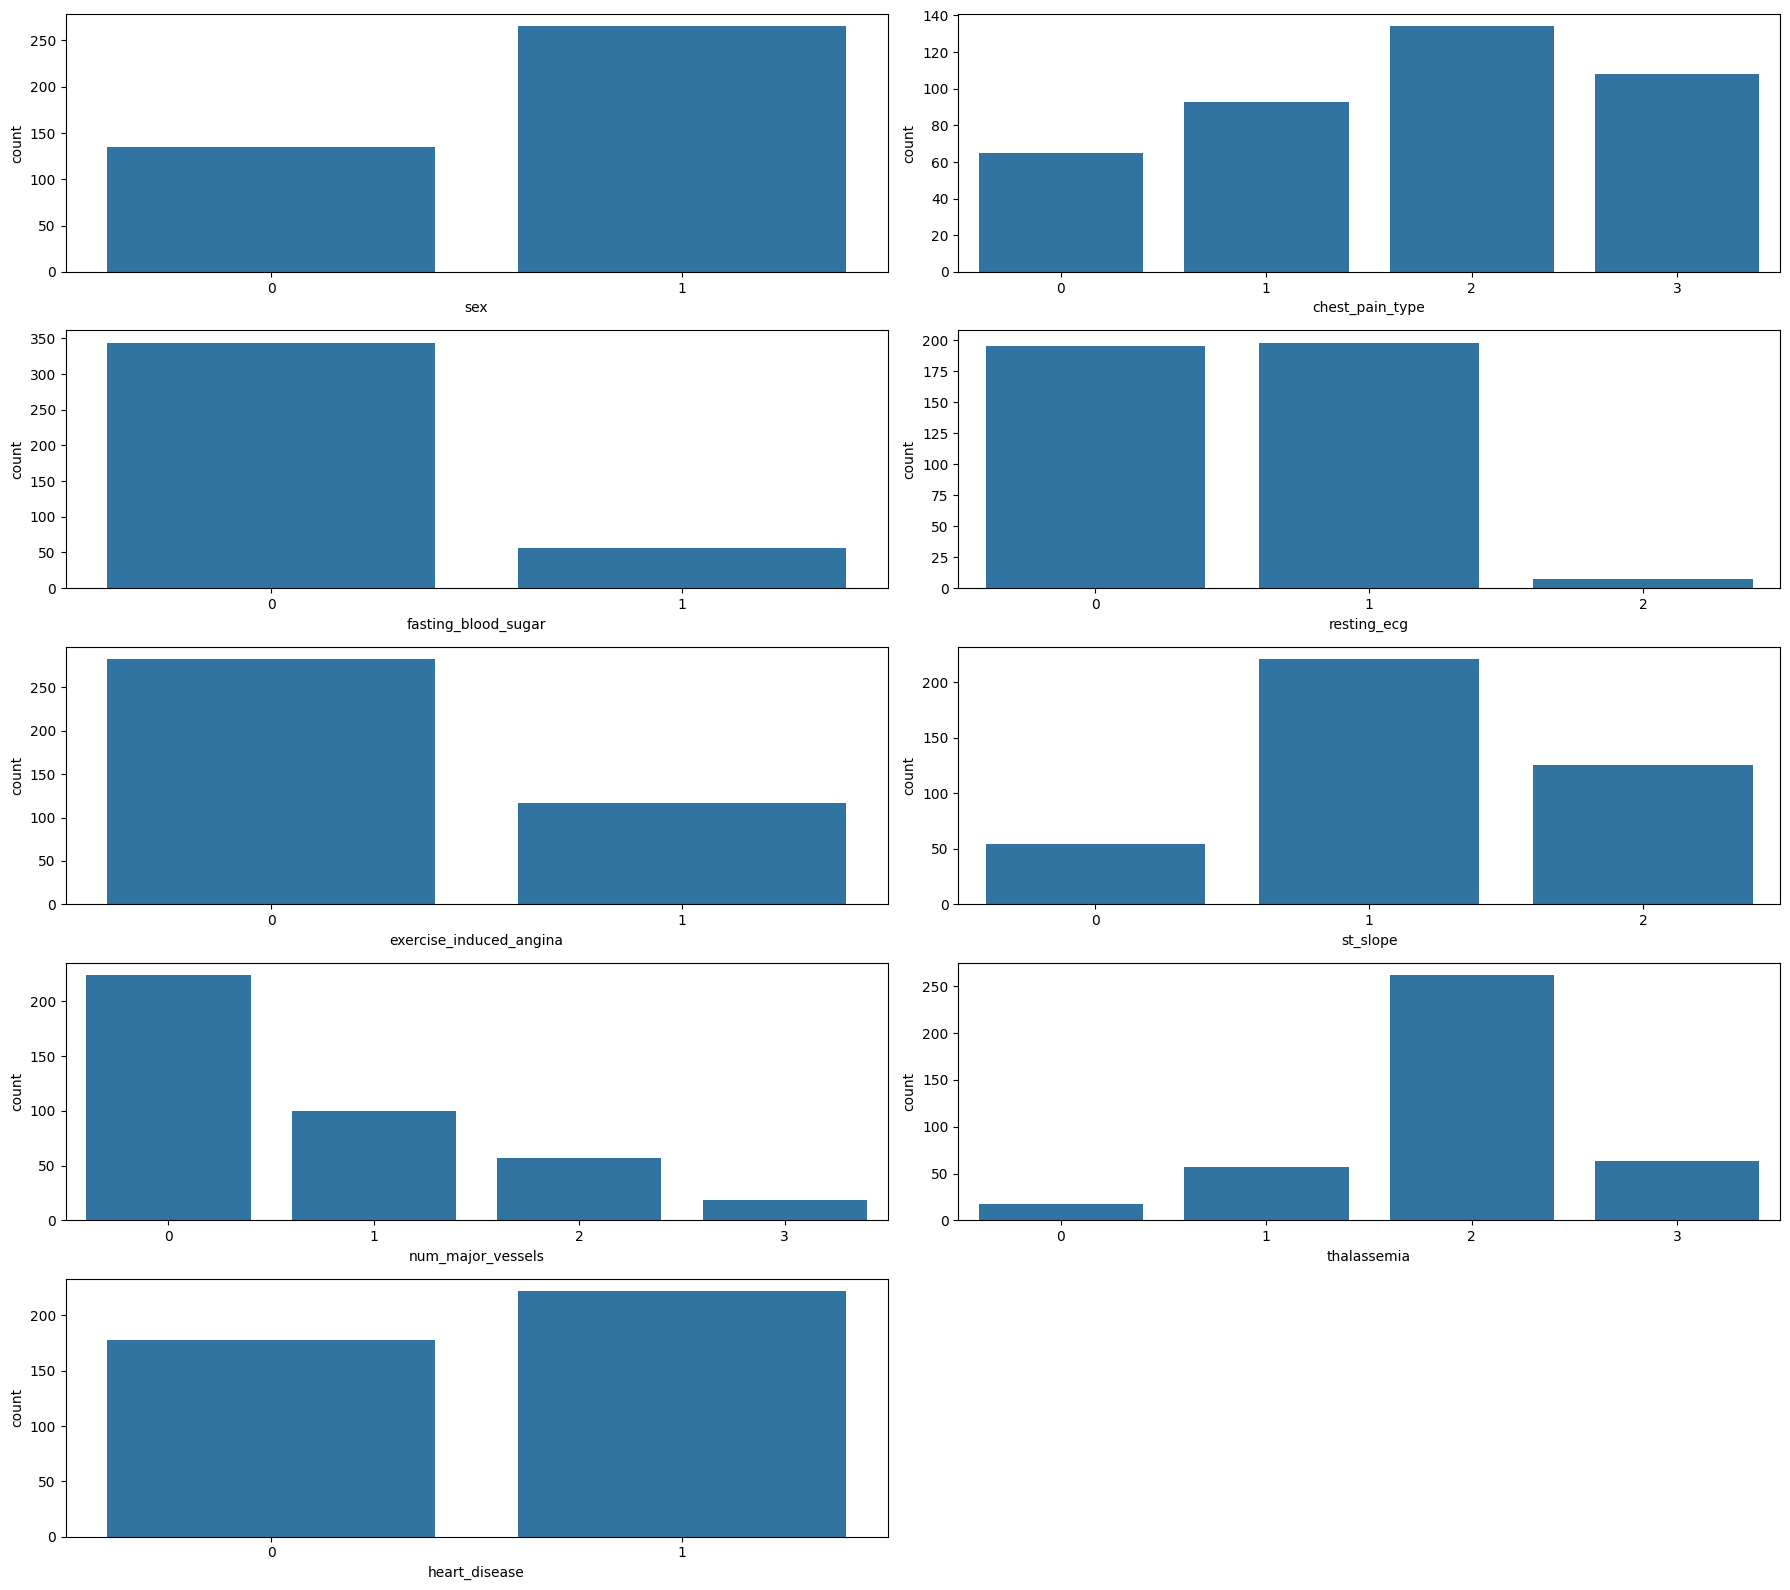

In [84]:
# Plotting categorical variables
plt.figure(figsize=(18, 16))
for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(5, 2, idx+1)
    sns.countplot(x=col, data=df)
    plt.tight_layout()
plt.show()

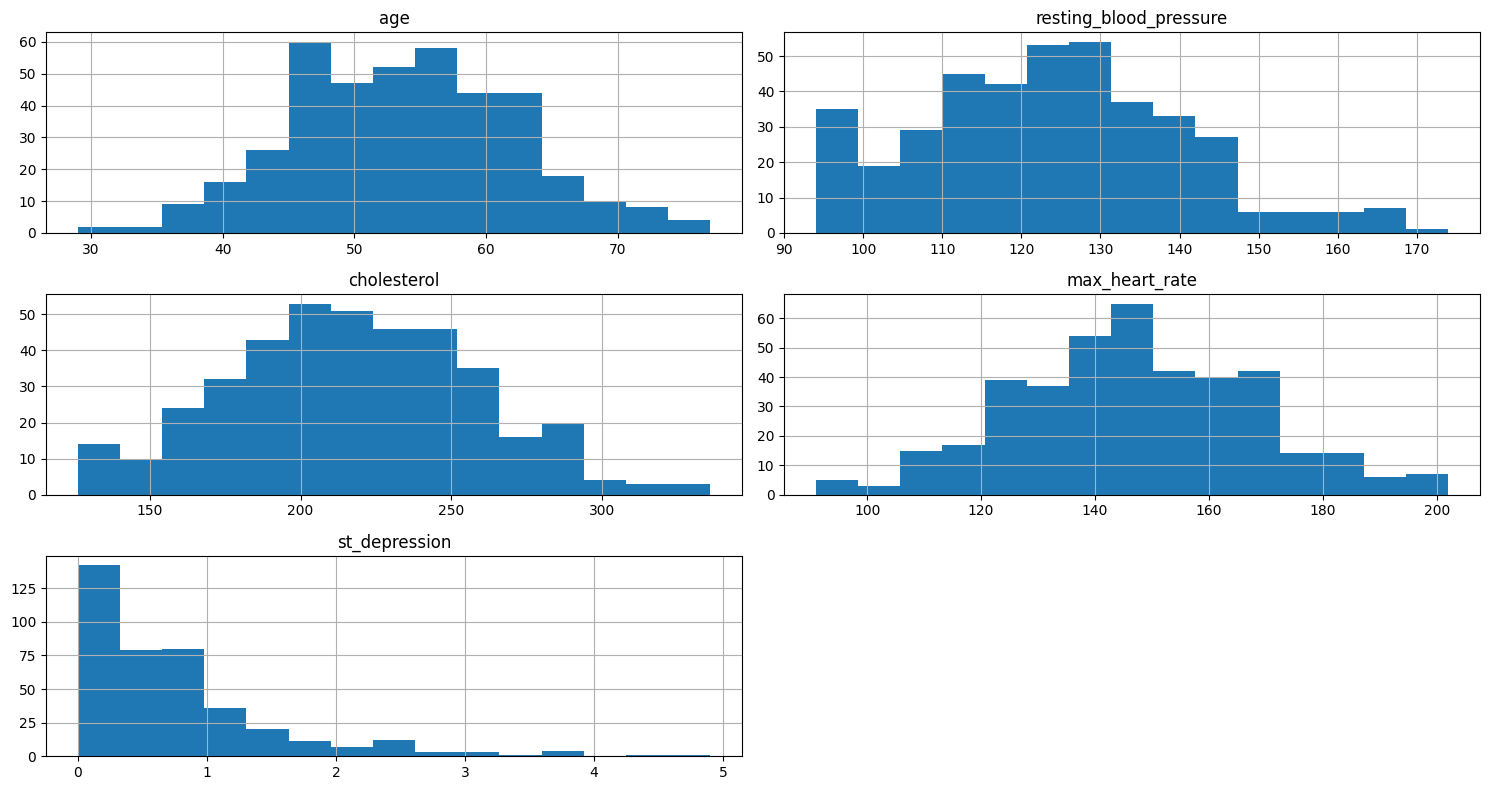

In [85]:
# List of numeric columns for histogram plotting
df[numeric_cols].hist(bins=15, figsize=(15, 8))
plt.tight_layout()
plt.show()


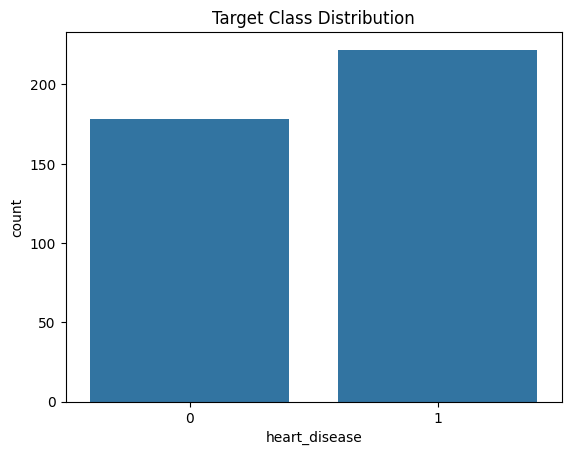

In [86]:
#Target balance plot
sns.countplot(x='heart_disease', data=df)
plt.title("Target Class Distribution")
plt.show()


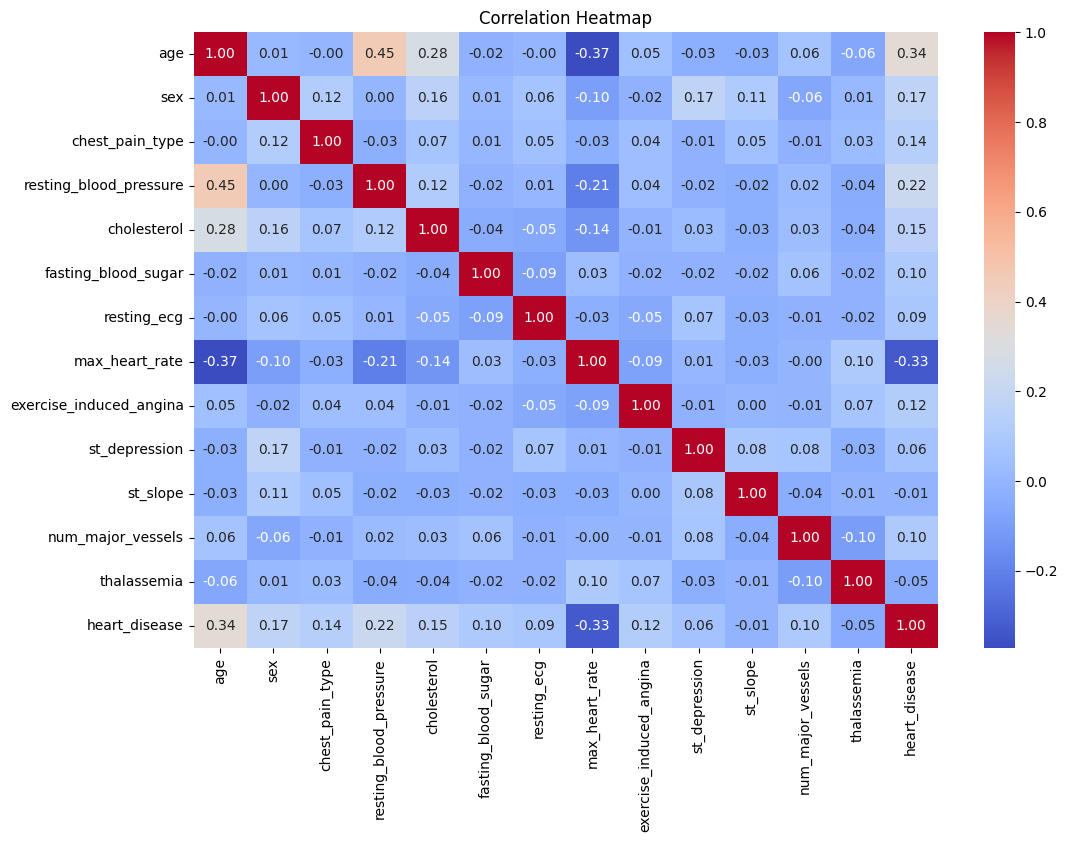

In [87]:
#correlation heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# step 4 data preprocessing

In [88]:
#No null values found, so no need for imputation

In [89]:
# # #one-hot encoding for categorical variables not required
# categorical_to_encode = ['chest_pain_type', 'resting_ecg', 'st_slope', 'thalassemia']
# df = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True)
# print(df.head())


In [90]:
#splitting features and target
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']


In [91]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [92]:
#Scaling numeric features
continuous_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression']
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])


# Decision Tree

## step 5 model building

In [93]:
# Initialize the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Step 6 evaluation metrics

In [94]:
# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Detailed Report: Precision, Recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.575
Confusion Matrix:
 [[16 20]
 [14 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.44      0.48        36
           1       0.60      0.68      0.64        44

    accuracy                           0.57        80
   macro avg       0.57      0.56      0.56        80
weighted avg       0.57      0.57      0.57        80



# Step 7 Plotting

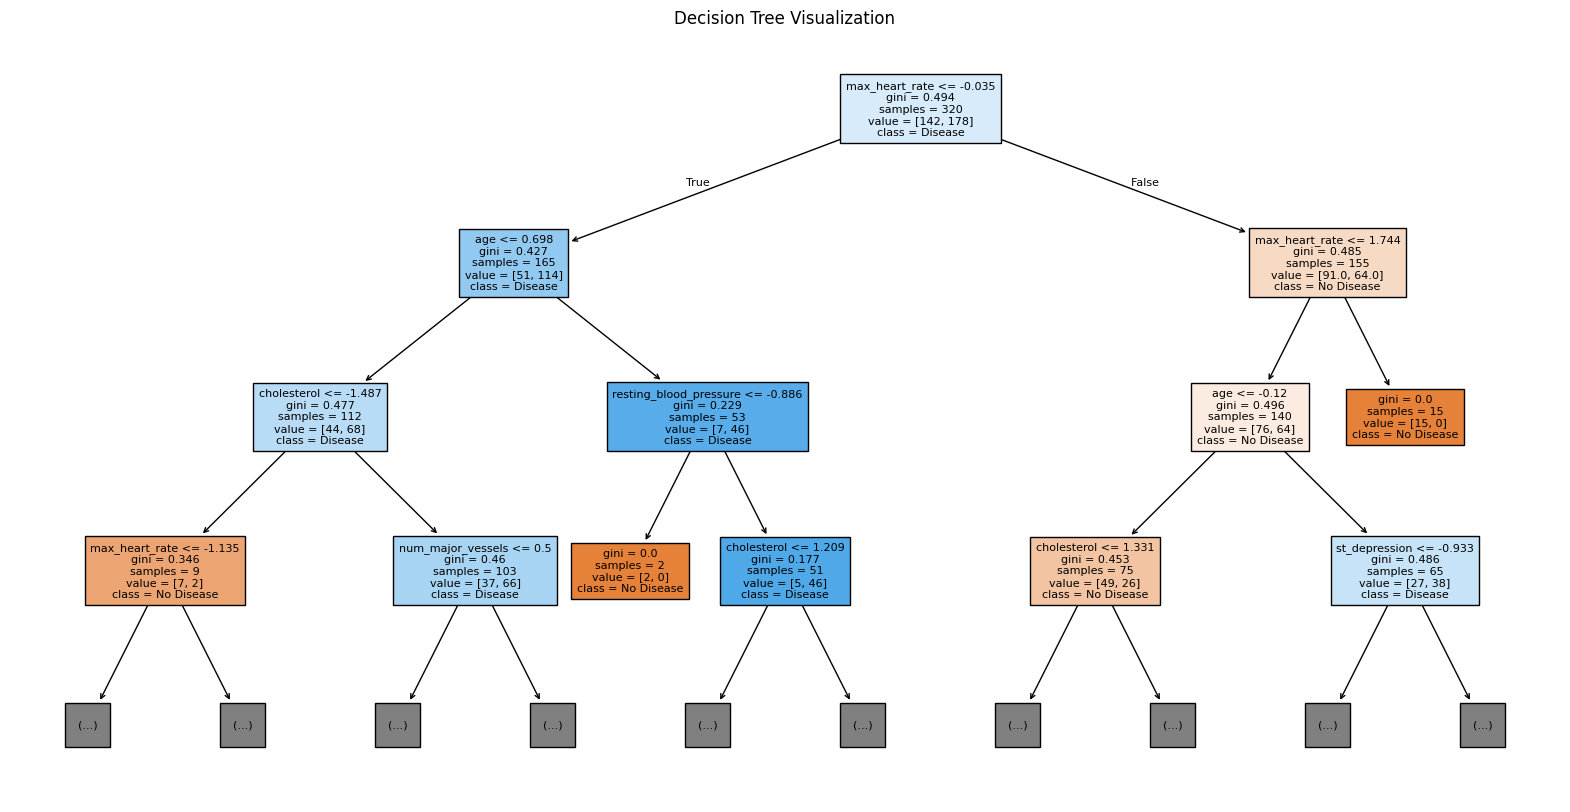

In [95]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, fontsize=8, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

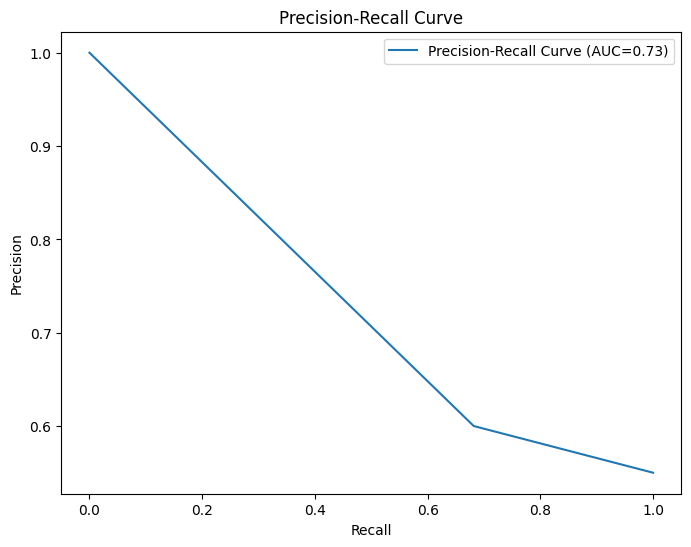

In [96]:
# Use predicted probabilities or decision function
y_scores = dt_model.predict_proba(X_test)[:, 1]  # For classifiers with predict_proba

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Random Forest

## Step 5 Model building

In [ ]:
# Create the random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Step 6 Evaluation Metrics

In [98]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
print("RF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Detailed metrics
print("RF Classification Report:\n", classification_report(y_test, y_pred_rf))



RF Accuracy: 0.675
RF Confusion Matrix:
 [[21 15]
 [11 33]]
RF Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.62        36
           1       0.69      0.75      0.72        44

    accuracy                           0.68        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.67      0.68      0.67        80



## Step 7 Plotting

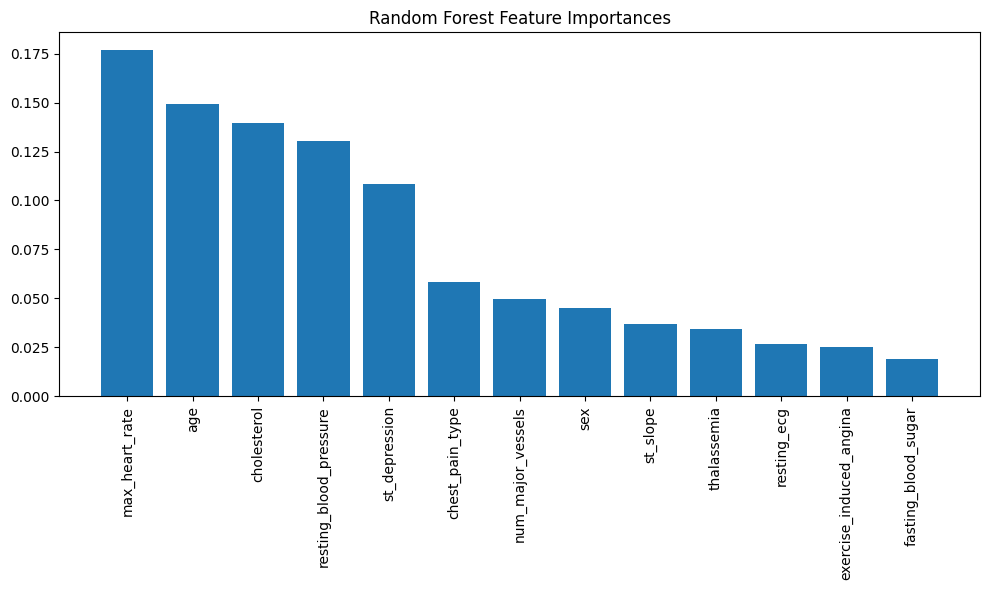

In [99]:
# Feature Importance Plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


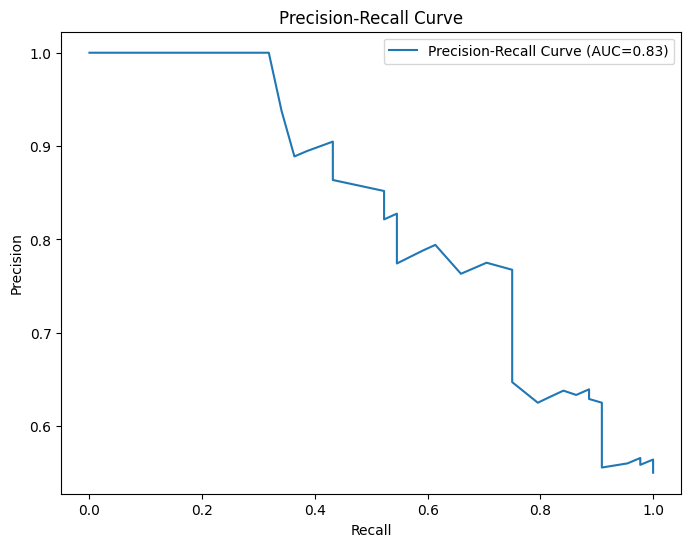

In [100]:
# Use predicted probabilities or decision function
y_scores = rf_model.predict_proba(X_test)[:, 1]  # For classifiers with predict_proba

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Logistic Regression

## Step 5 Model building

In [ ]:
# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## Step 6 Evaluation Metrics

In [102]:
# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Detailed Report
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))




Logistic Regression Accuracy: 0.6625
Logistic Regression Confusion Matrix:
 [[21 15]
 [12 32]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61        36
           1       0.68      0.73      0.70        44

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



## Step 7 Plotting

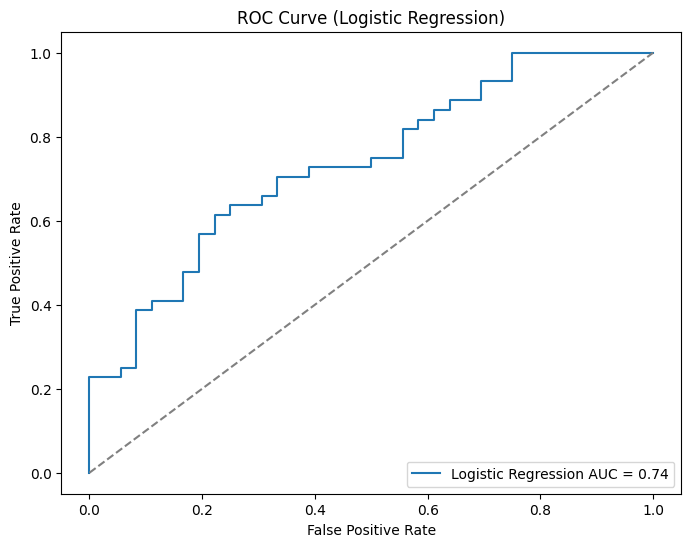

In [103]:
# ROC Curve
y_pred_proba = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression AUC = {:.2f}'.format(roc_auc))
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

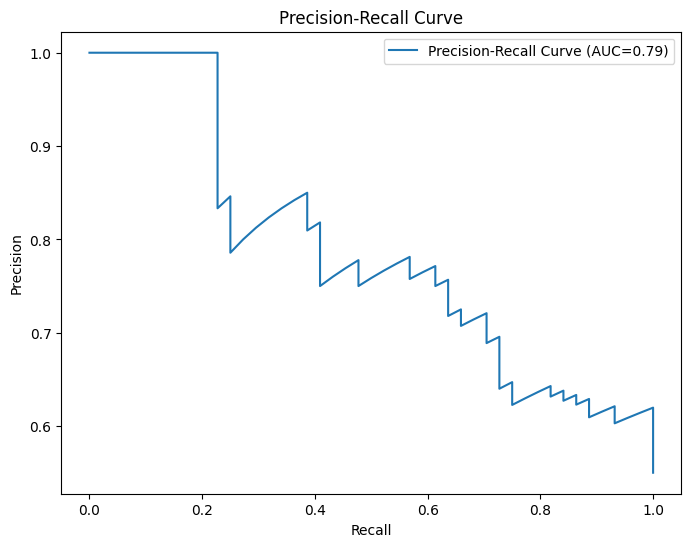

In [104]:
# Use predicted probabilities or decision function
y_scores = lr_model.predict_proba(X_test)[:, 1]  # For classifiers with predict_proba

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# SVM

## Step 5 Model building

In [ ]:
# Initialize and train the SVM model
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

## Step 6 Evaluation Metrics

In [106]:
# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Detailed Report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))



SVM Accuracy: 0.6375
SVM Confusion Matrix:
 [[19 17]
 [12 32]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57        36
           1       0.65      0.73      0.69        44

    accuracy                           0.64        80
   macro avg       0.63      0.63      0.63        80
weighted avg       0.63      0.64      0.63        80



## Step 7 Plotting

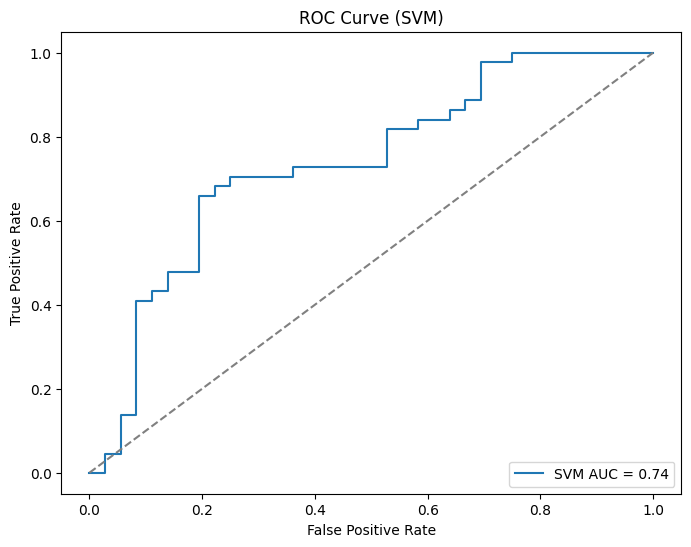

In [107]:
# ROC Curve
y_pred_proba = svm_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SVM AUC = {:.2f}'.format(roc_auc))
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.show()


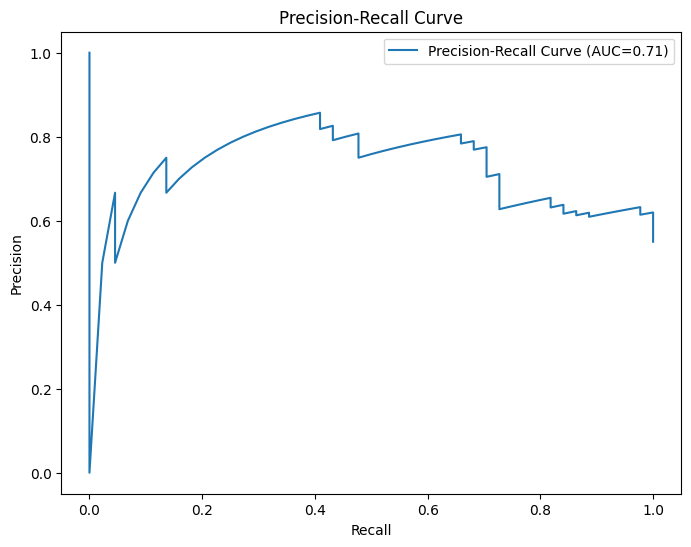

In [108]:
# Use predicted probabilities or decision function
y_scores = svm_model.predict_proba(X_test)[:, 1]  # For classifiers with predict_proba

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Decision Boundary

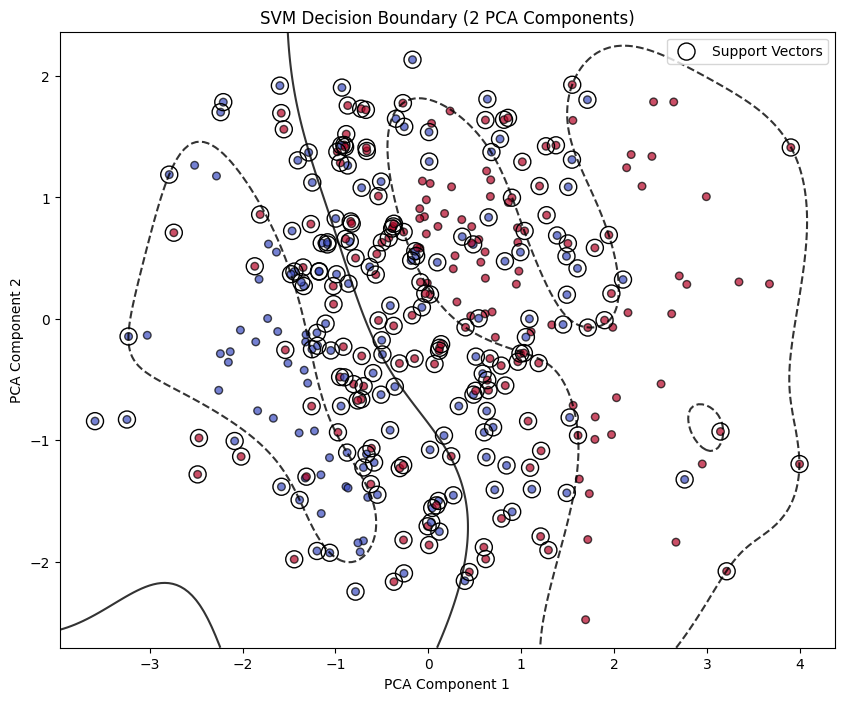

In [109]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components for 2D plotting
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data
svm_model_2d = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_2d.fit(X_train_2d, y_train)

# Plot points, hyperplane, margins, support vectors
plt.figure(figsize=(10,8))

# Plot training points
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='k', alpha=0.7)
plt.title('SVM Decision Boundary (2 PCA Components)')

# Create mesh to plot decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                     np.linspace(ylim[0], ylim[1], 200))
Z = svm_model_2d.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
contour = ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1],
            alpha=0.8, linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(svm_model_2d.support_vectors_[:, 0], svm_model_2d.support_vectors_[:, 1], 
           s=150, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Step 7 Model Comparison

In [ ]:
# Predict probabilities for ROC curve (if model has predict_proba)
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred_lr_proba = lr_model.predict_proba(X_test)[:, 1]
y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]

# Calculate metrics for each model
results = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'ROC-AUC': []
}

model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']
y_preds = [y_pred_dt, y_pred_rf, y_pred_lr, y_pred_svm]
probas = [y_pred_dt_proba, y_pred_rf_proba, y_pred_lr_proba, y_pred_svm_proba]

for name, y_pred, y_proba in zip(model_names, y_preds, probas):
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred))
    results['Recall'].append(recall_score(y_test, y_pred))
    results['ROC-AUC'].append(roc_auc_score(y_test, y_proba))

# Tabular summary
results_df = pd.DataFrame(results)
print(results_df)



                 Model  Accuracy  F1 Score  Precision    Recall   ROC-AUC
0        Decision Tree    0.5750  0.638298   0.600000  0.681818  0.563131
1        Random Forest    0.6750  0.717391   0.687500  0.750000  0.759470
2  Logistic Regression    0.6625  0.703297   0.680851  0.727273  0.735480
3                  SVM    0.6375  0.688172   0.653061  0.727273  0.736742


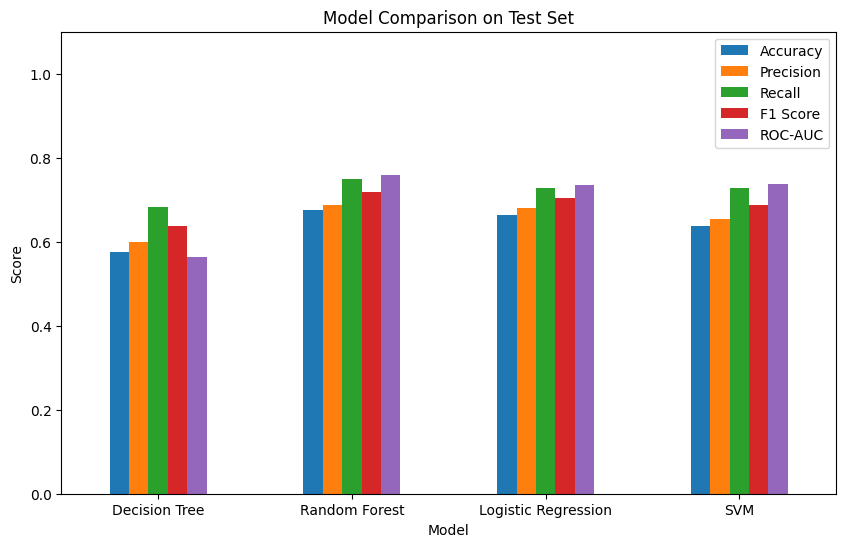

In [111]:
# Bar chart for Accuracy, Precision, Recall F1, ROC-AUC
results_df.plot(x='Model',  y=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'], kind='bar', figsize=(10,6))
plt.title('Model Comparison on Test Set')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.show()

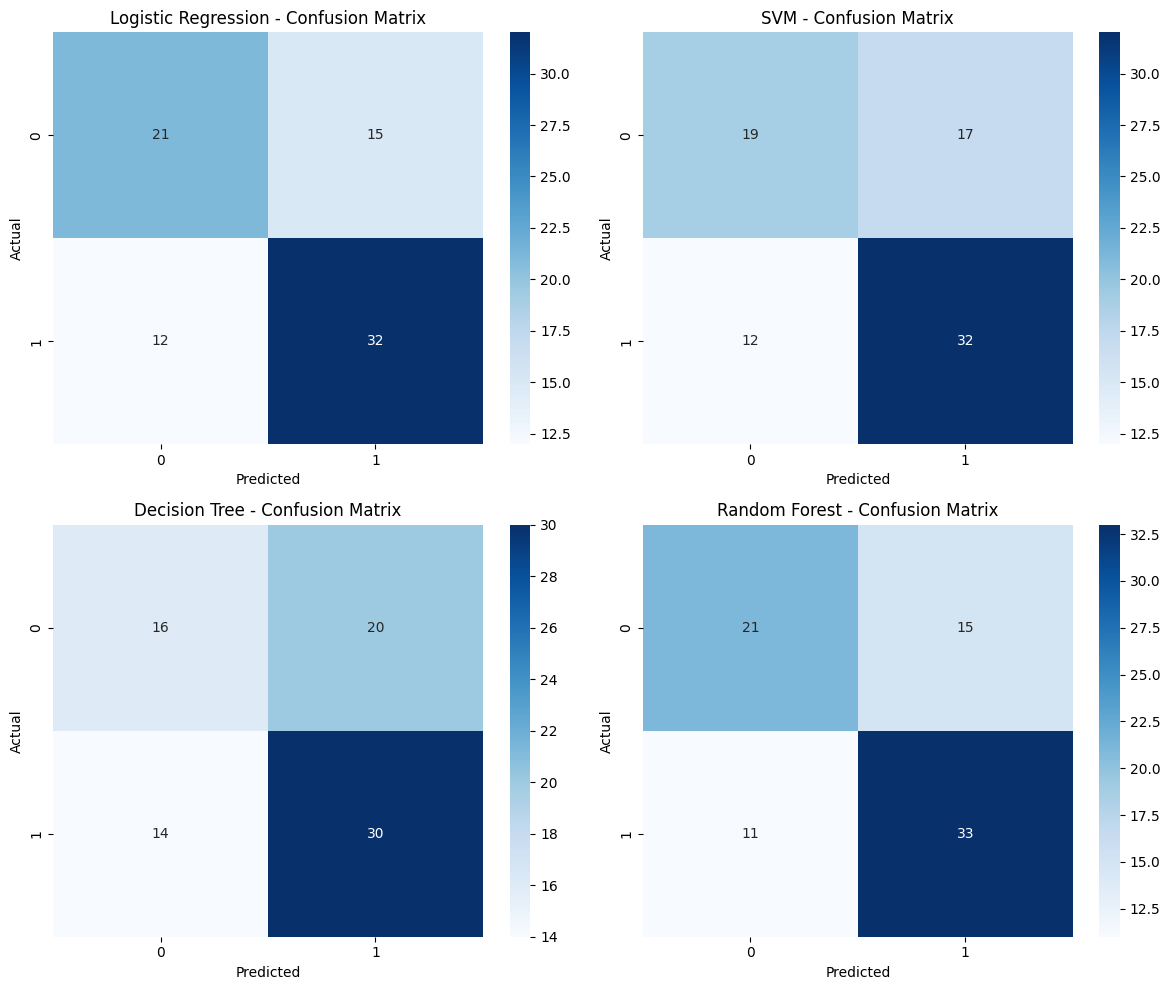

In [112]:
# Compute confusion matrices for each model
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Set up plot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("Logistic Regression - Confusion Matrix")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

# SVM
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title("SVM - Confusion Matrix")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", ax=axes[1, 0])
axes[1, 0].set_title("Decision Tree - Confusion Matrix")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=axes[1, 1])
axes[1, 1].set_title("Random Forest - Confusion Matrix")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


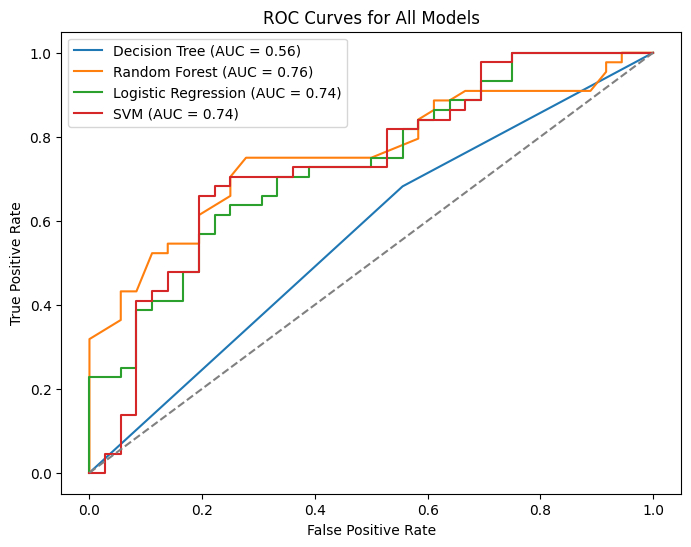

In [113]:
# Plot all ROC curves together
plt.figure(figsize=(8,6))
for name, y_proba in zip(model_names, probas):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()


# Step 8 Model Selection

# Random forest is selected 

In [ ]:

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [115]:
# Final Evaluation of the best model on the test set before concatination

y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
print("Final Model Accuracy:", acc)
print("Final Model ROC-AUC:", auc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Final Model Accuracy: 0.6625
Final Model ROC-AUC: 0.744949494949495
Confusion Matrix:
 [[23 13]
 [14 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.64      0.63        36
           1       0.70      0.68      0.69        44

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



In [116]:
# Assuming y_test, y_pred_rf, and y_pred_rf_proba are available in your notebook
metrics_dict = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_pred_rf_proba)
}

# Save metrics dictionary to JSON file
with open('model_metrics.json', 'w') as f:
    json.dump(metrics_dict, f)

print("Model evaluation metrics saved to 'model_metrics.json'")


Model evaluation metrics saved to 'model_metrics.json'


In [117]:
# Combine features back into full dataset
X_full = pd.concat([X_train, X_test], axis=0)

# Combine target back into full target set
y_full = pd.concat([y_train, y_test], axis=0)

# Optional: Reset index if needed
X_full.reset_index(drop=True, inplace=True)
y_full.reset_index(drop=True, inplace=True)

# Verify combined shape
print("Combined feature set shape:", X_full.shape)
print("Combined target set shape:", y_full.shape)

# Train Random Forest on the entire dataset

rf_final_model = RandomForestClassifier(random_state=42)
rf_final_model.fit(X_full, y_full)


Combined feature set shape: (400, 13)
Combined target set shape: (400,)


RandomForestClassifier(random_state=42)

In [118]:
#to check model trained or not
print("Number of trees in forest:", len(rf_final_model.estimators_))

Number of trees in forest: 100


# Step 9 Saving the Model 

In [119]:
# Saving files/ Save the trained model
with open('Heart_disease_rf_model.pkl', 'wb') as f:
    pickle.dump(rf_final_model, f)
print("Model saved as Heart_disease_rf_model.pkl")

# Save the scaler used for preprocessing
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as scaler.pkl")

# Save the list of feature columns
feature_columns = list(X_full.columns)  # or X_train.columns if you prefer
with open('feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)
print("Feature columns saved as feature_columns.json")

Model saved as Heart_disease_rf_model.pkl
Scaler saved as scaler.pkl
Feature columns saved as feature_columns.json
